## Load the standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

## Step 3: Data Cleaning and Preprocessing

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Observations:

1. No text data hence no feature encoding
2. Feature Scaling is necessary for this data as some variables are not on same scale

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [7]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = ss.fit_transform(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,8,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,1,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,0,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


## Step 4: Seperate X and y

In [9]:
X = data.drop('Outcome', axis = 1)
y = data['Outcome']

## Step 5: Split the data into train test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Step 6: Apply Logistic Regression on the train data

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [12]:
lr.fit(X_train, y_train)

LogisticRegression()

## Step 7: Perform prediction on X_test

In [13]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,2.444478,0.356432,1.409094,-0.692891,1.384362,2.784923,-0.956462
122,2,-0.434859,0.253036,0.593630,0.175399,0.204013,-0.204994,-0.871374
113,4,-1.405071,-0.367337,-1.288212,-0.692891,0.254780,-0.244256,-0.701198
14,5,1.411672,0.149641,-0.096379,0.826616,-0.785957,0.347687,1.511083
529,0,-0.309671,-0.212243,-1.288212,-0.692891,-0.938260,0.568156,-0.190672
...,...,...,...,...,...,...,...,...
165,6,-0.528751,0.253036,-0.159107,0.661641,-0.265588,0.755403,0.660206
188,8,-0.372265,0.356432,1.158182,0.296960,-0.519427,0.507754,-0.190672
334,1,-0.810425,-0.470732,-0.159107,-0.189283,-1.027104,-0.639892,-0.956462
758,1,-0.466156,0.356432,-1.288212,-0.692891,0.698998,-0.830159,-0.616111


## Step 8: Perform Evaluations

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[141,  16],
       [ 35,  39]], dtype=int64)

141 - False Negative (141 women did not have diabetes and ML also predicting not having diabetes)  
39 - True Positive (39 women had diabetes and ML also predicting has diabetes)  
16 - False Postive (16 women did not have diabetes and ML is predicting has diabetes)  
35 - True Negative (35 women had diabetes and ML is predicting did not have diabetes)  

In [16]:
(141 + 39)  / (141 + 39 + 16 + 35)

0.7792207792207793

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7792207792207793

In [29]:
lr.coef_[0][0]

0.08680691115193469

In [37]:
lr.intercept_

array([-1.18474841])

In [34]:
# Parameter values
a0 = lr.intercept_[0]
a1 = lr.coef_[0][5]
a2 = lr.coef_[0][6]

In [35]:
# Defining x1 and x2 values for decision boundary
x1 = np.array([69, 71])
x2 = (-a0 - (a1 * x1)) / a2

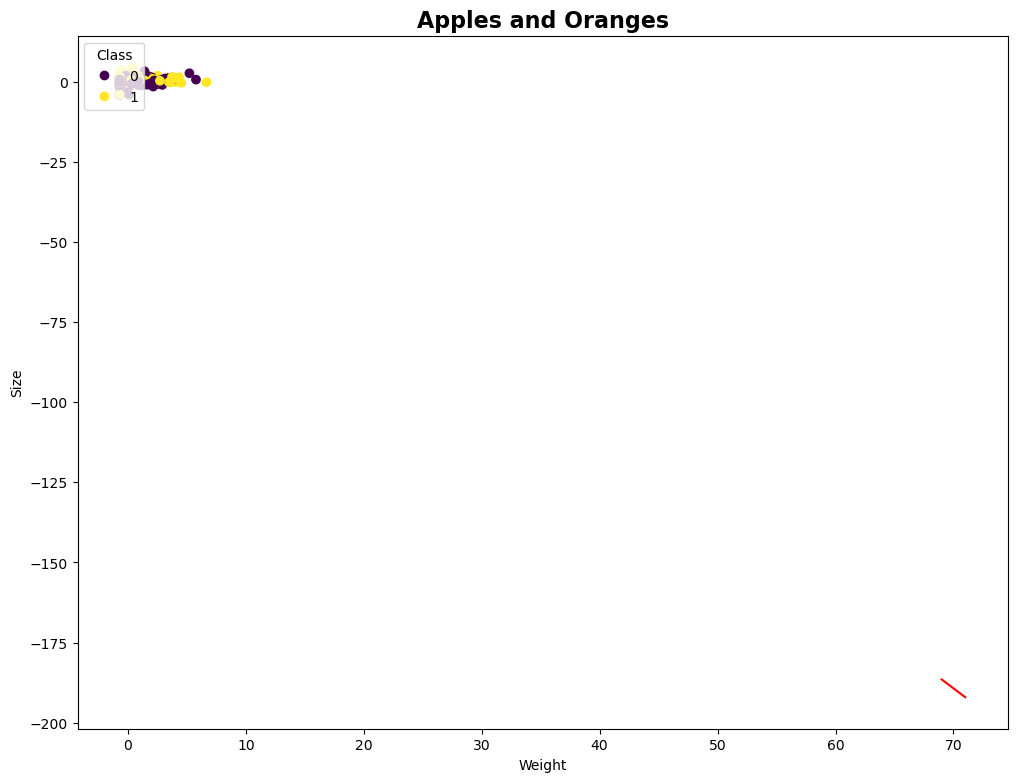

In [36]:
# Plotting the decision boundary
plt.figure(figsize=(12,9))
plt.title('Apples and Oranges', fontweight='bold', fontsize=16)
plt.xlabel('Weight')
plt.ylabel('Size')
scatter = plt.scatter(data['Insulin'], data['BMI'], c=data['Outcome'], cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2, color='red', label='Decision Boundary')
plt.show()